Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Title
Introduction:
provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
clearly state the question you tried to answer with your project
identify and fully describe the dataset that was used to answer the question


**Methods & Results:
describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
loads data 
wrangles and cleans the data to the format necessary for the planned analysis
performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
performs the data analysis
creates a visualization of the analysis 
note: all figures should have a figure number and a legend**



Discussion:
summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?
References
You may include references if necessary, as long as they all have a consistent citation style.







In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


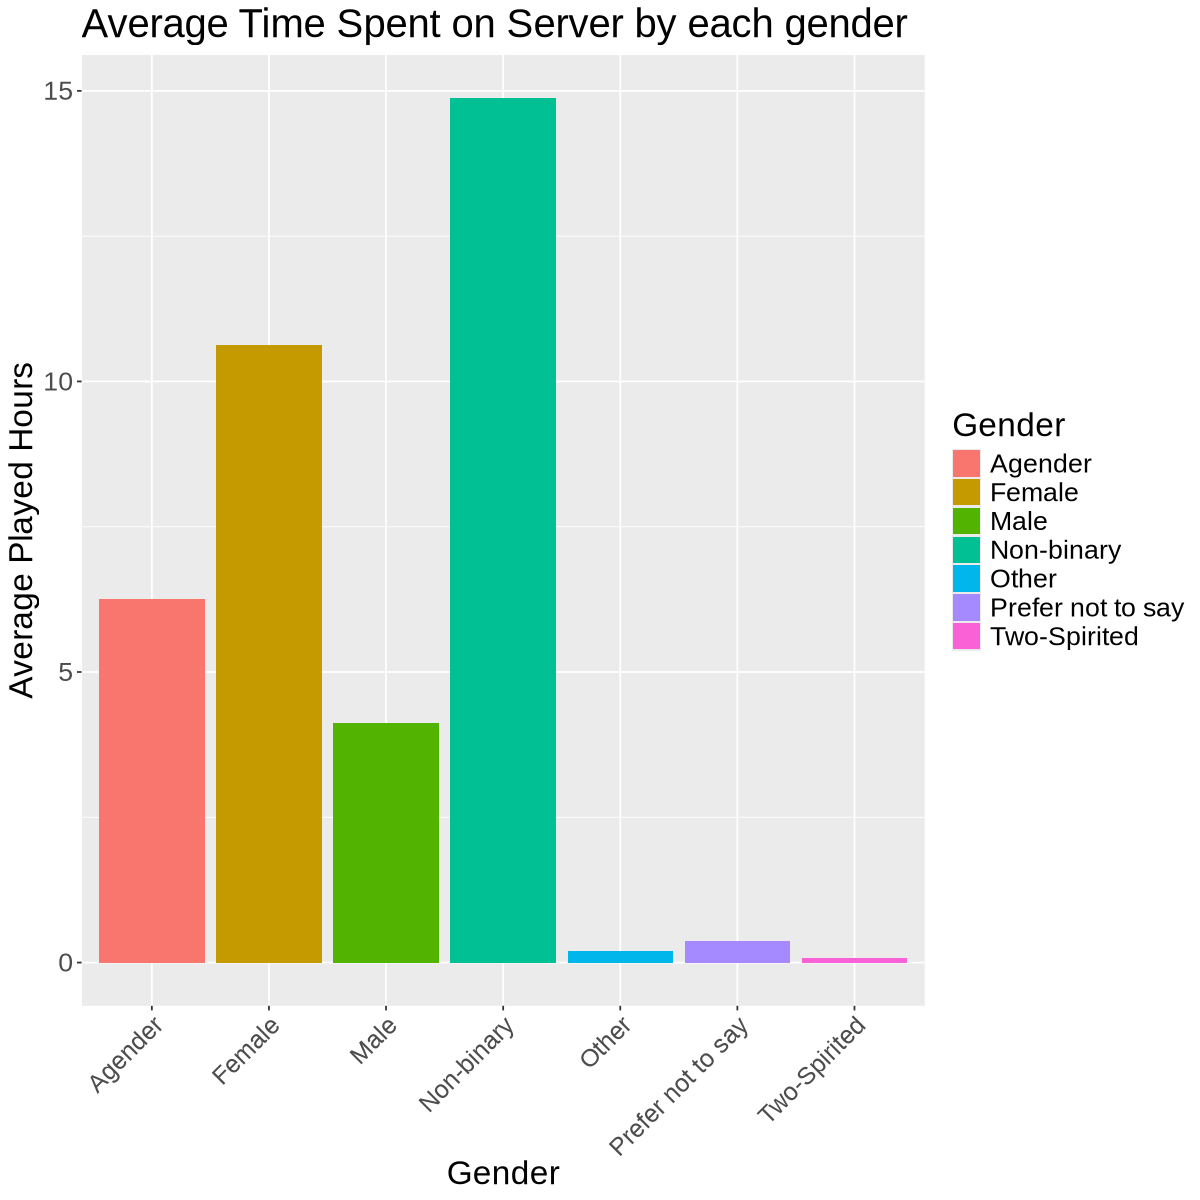

In [32]:
options(repr.plot.width = 10, repr.plot.height = 10)

#gender vs playedtime
playersByGender <- players |>
    group_by(gender) |>
    summarize(mean_played_hours = mean(played_hours))

genderVsPlayedHoursBar <- playersByGender |>
    ggplot(aes(x = gender, y = mean_played_hours, fill = gender)) +
    geom_bar(stat = "identity") +
    labs(x = "Gender", y = "Average Played Hours", fill = "Gender") +
    ggtitle("Average Time Spent On Server By Each Gender") +
    theme(text = element_text(size = 20)) +
    theme(axis.text.x = element_text(size = 15, angle = 45, hjust = 1))
genderVsPlayedHoursBar

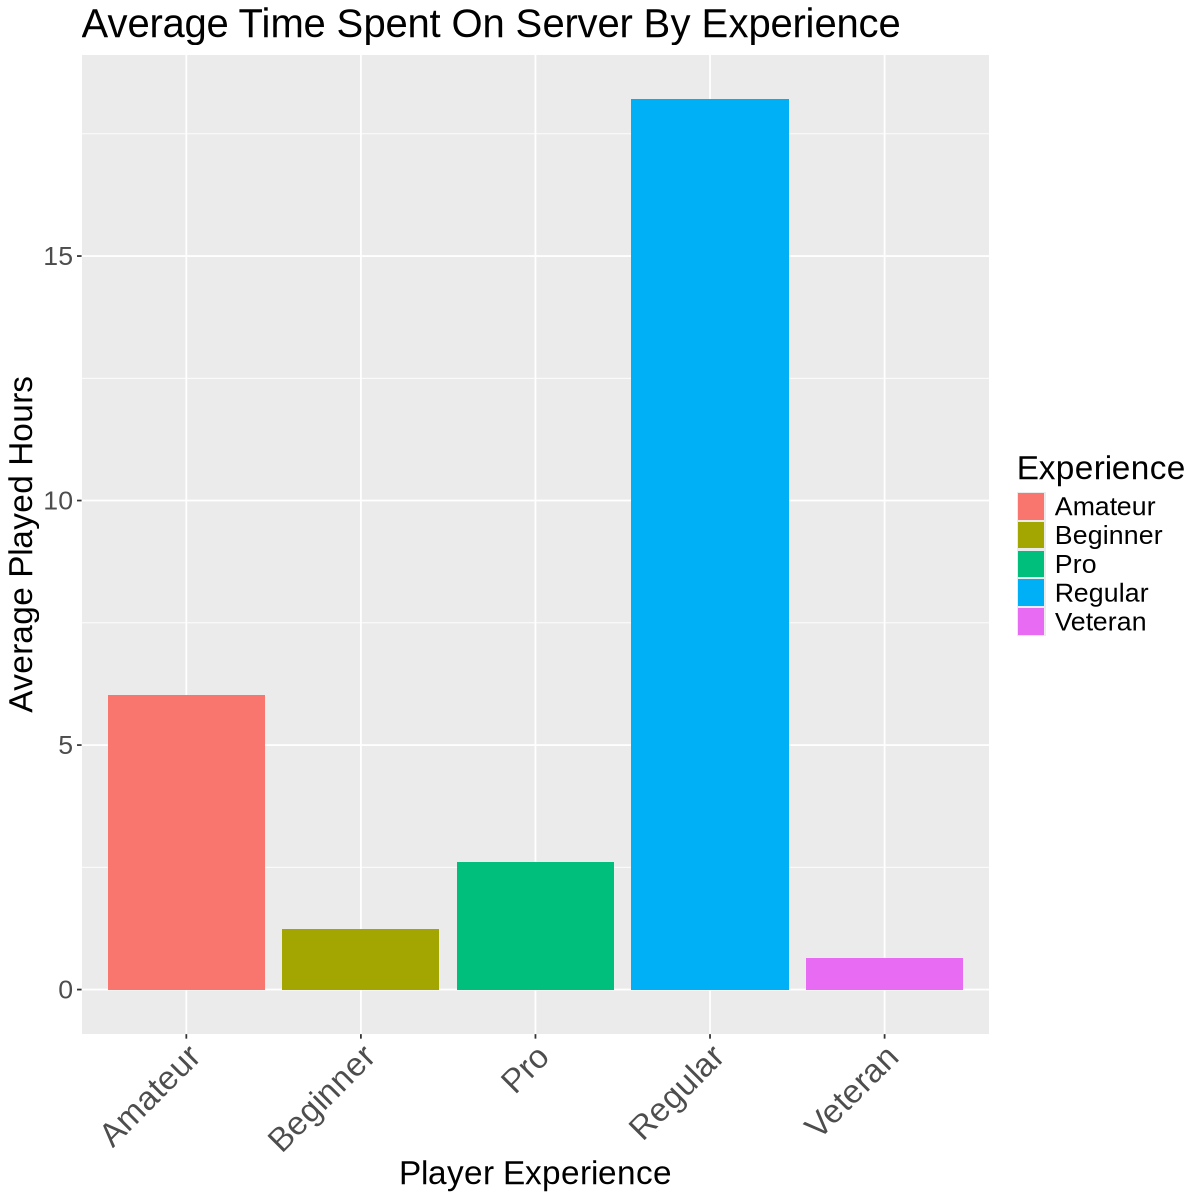

In [47]:
options(repr.plot.width = 10, repr.plot.height = 10)

#Experience Vs Played Time
playersByExperience <- players |>
    group_by(experience) |>
    summarize(mean_played_hours = mean(played_hours))

ExperienceVsPlayedHours <- playersByExperience |>
    ggplot(aes(x = experience, y = mean_played_hours, fill = experience)) +
    geom_bar(stat= "identity") +
    labs(x = "Player Experience", y = "Average Played Hours", fill = "Experience") +
    ggtitle("Average Time Spent On Server By Experience") +
    theme(text = element_text(size = 20)) +
    theme(axis.text.x = element_text(size = 20, angle = 45, hjust = 1))
ExperienceVsPlayedHours

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


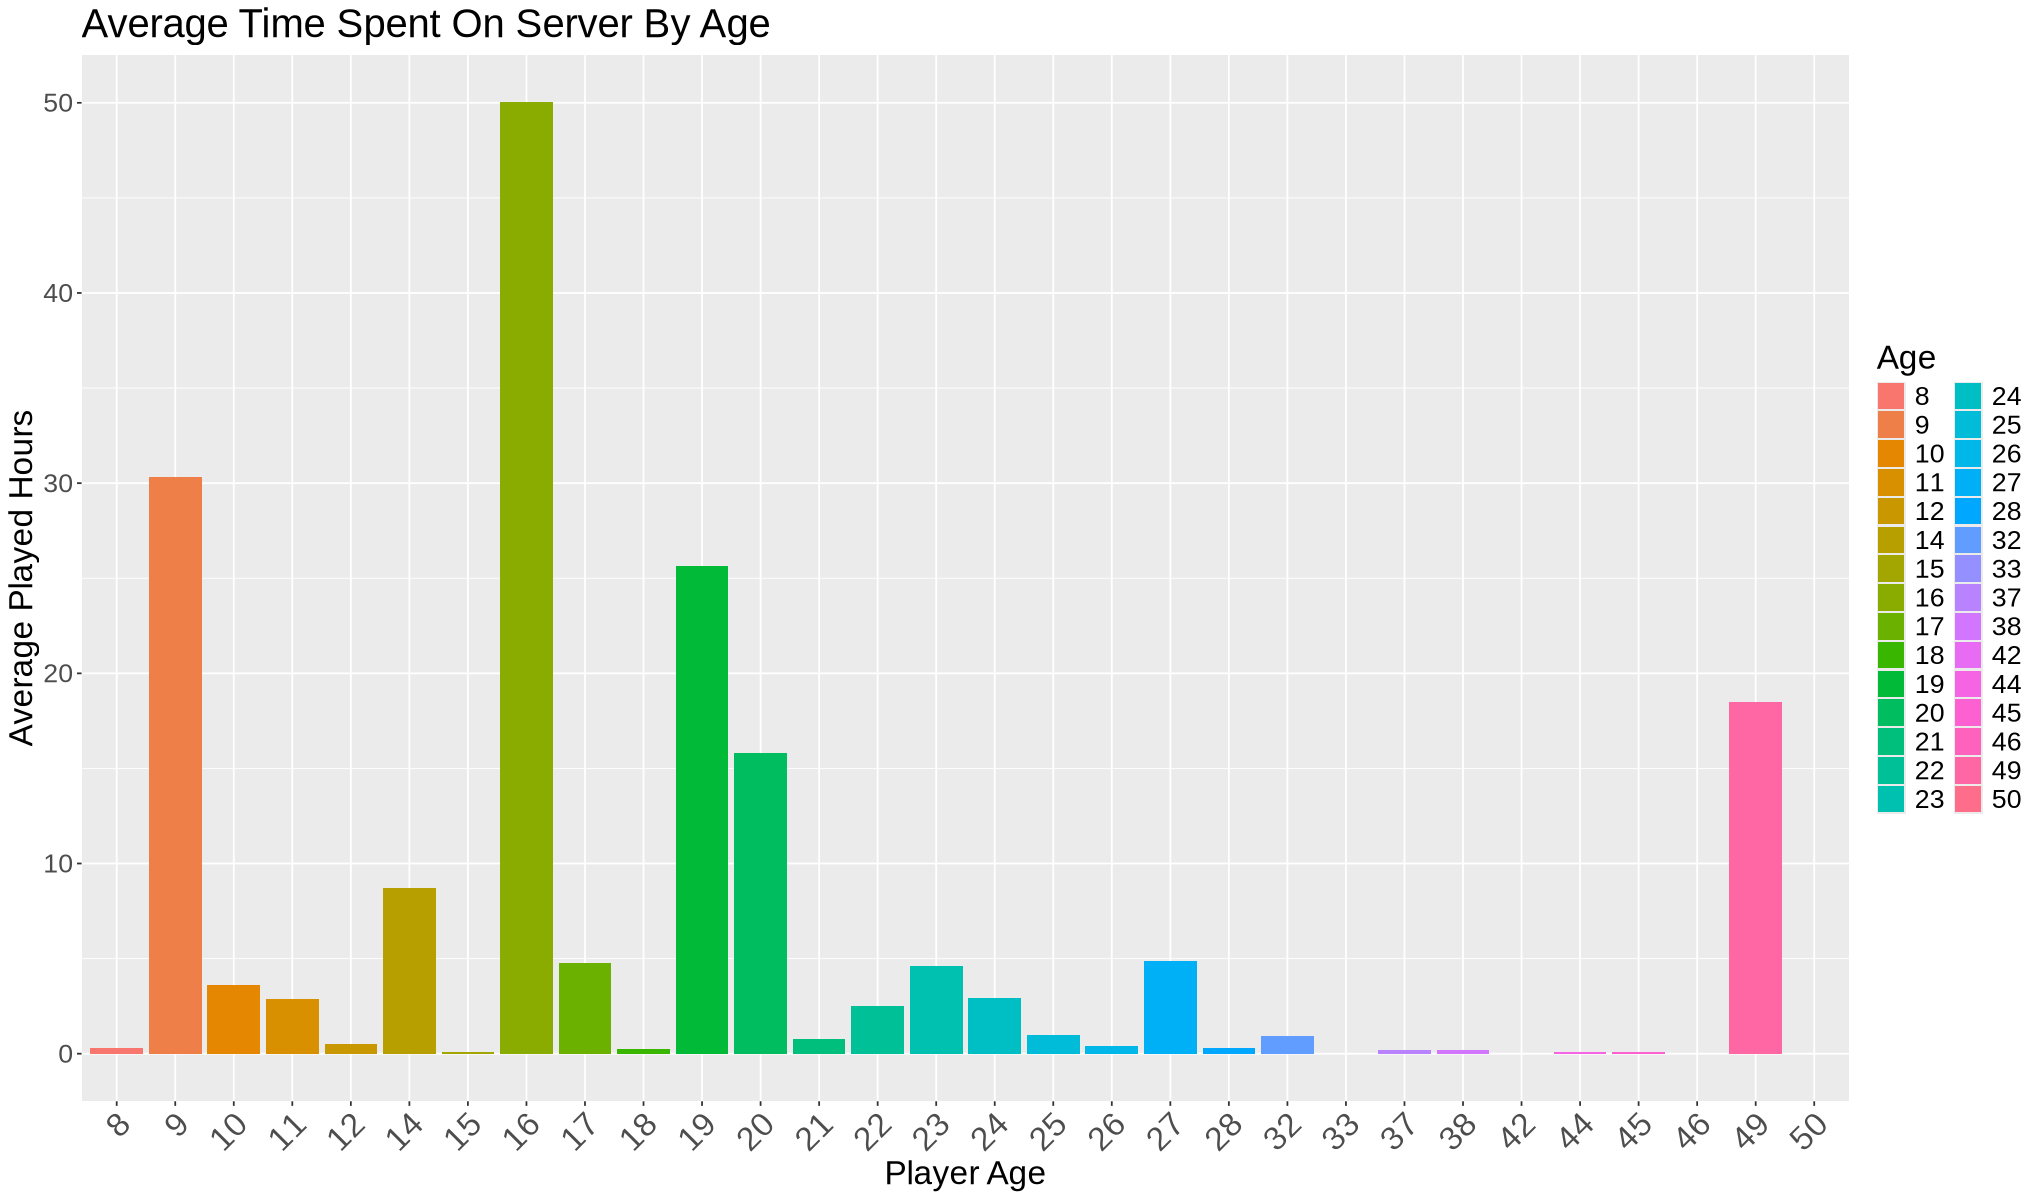

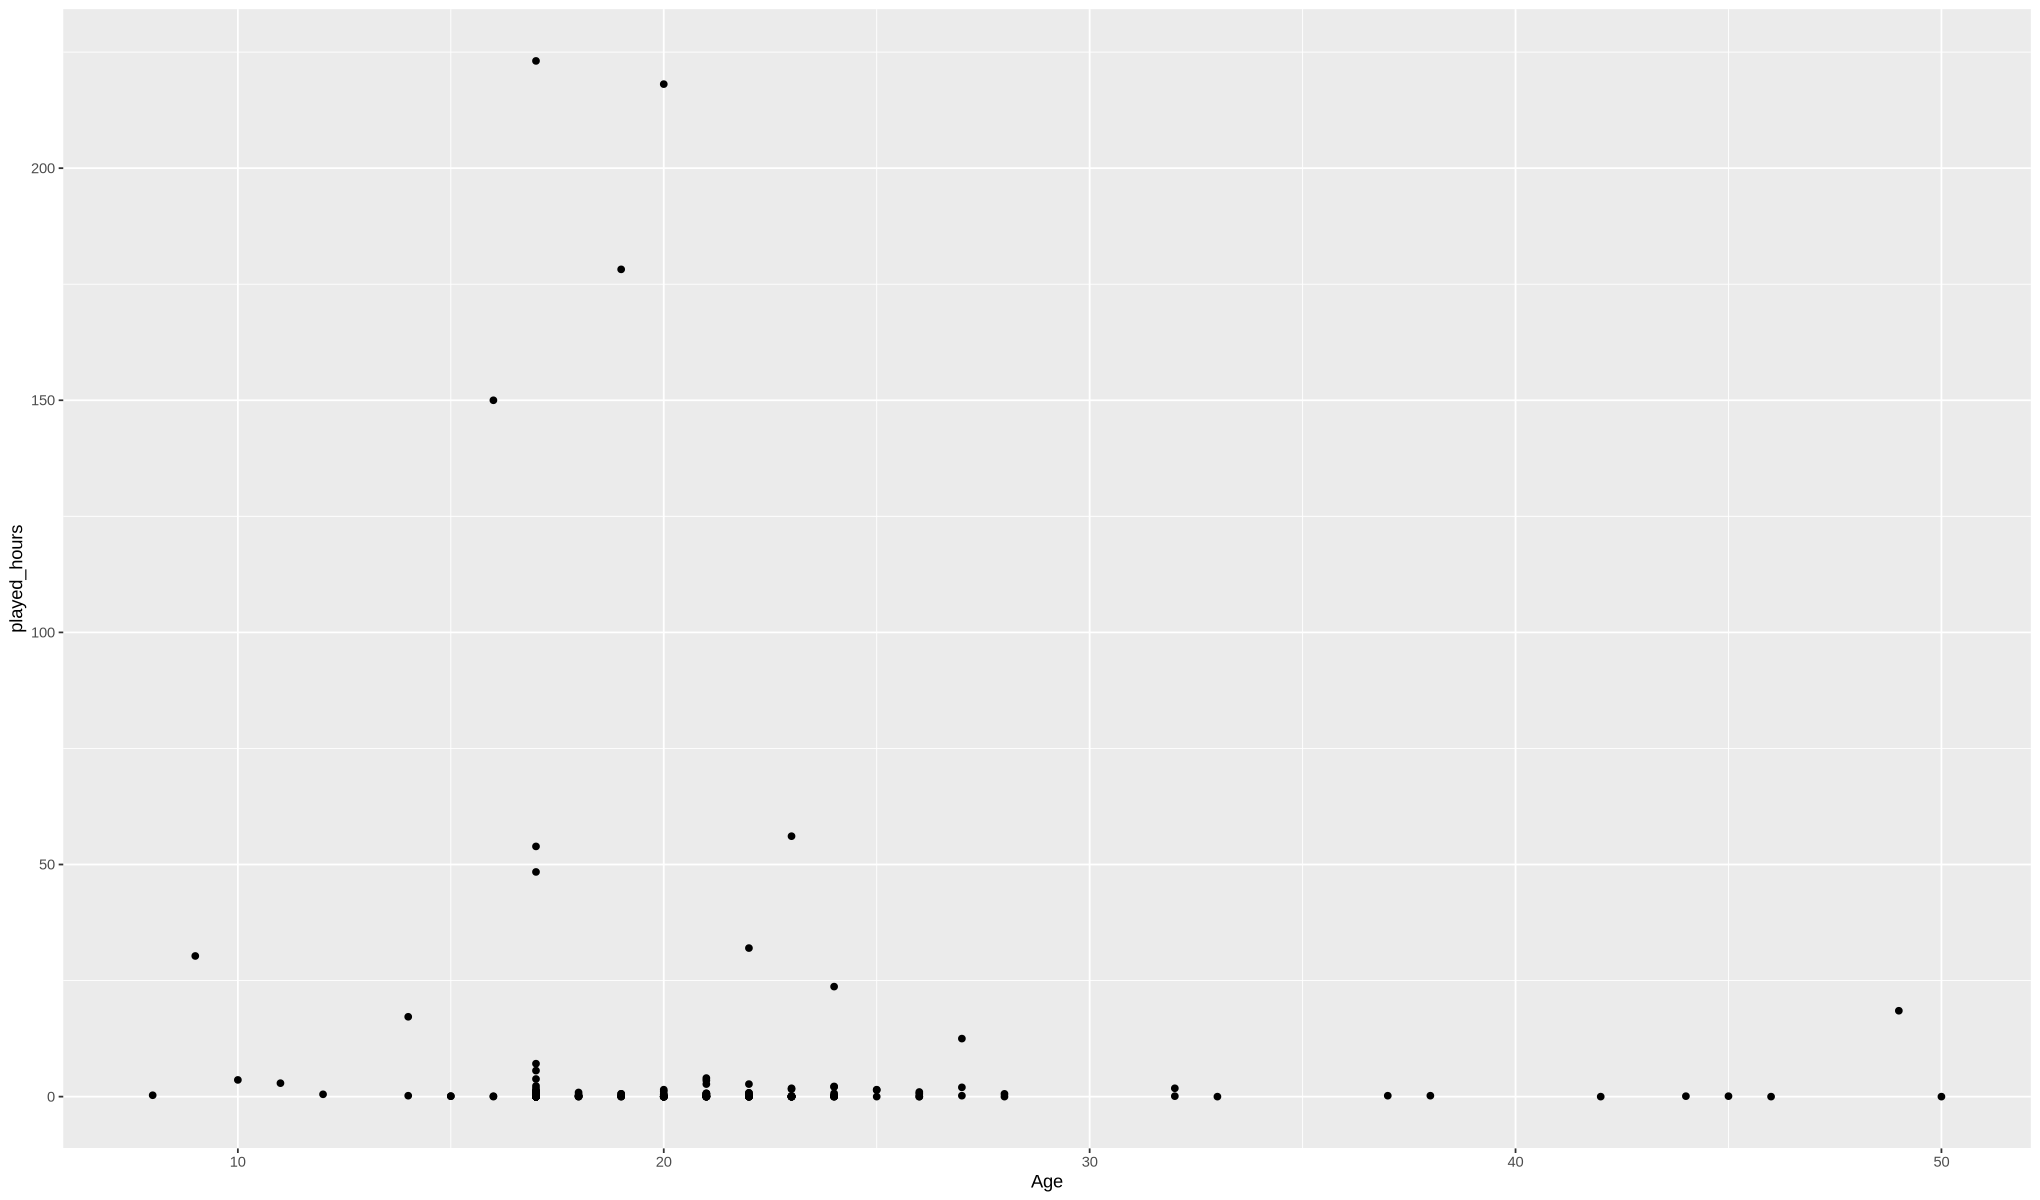

In [54]:
options(repr.plot.width = 17, repr.plot.height = 10)
#ageVsPlayedTime  QUESTION: should we not also create Bar Graph?
playersByAge <- players |>
    group_by(Age) |>
    summarize(mean_played_hours = mean(played_hours)) |>
    mutate(Age = as.factor(Age)) |>
    filter(!is.na(Age))
ageVsPlayedHoursBar <- playersByAge |>
    ggplot(aes(x = Age, y = mean_played_hours, fill = Age)) +
    geom_bar(stat= "identity") +
    labs(x = "Player Age", y = "Average Played Hours", fill = "Age") +
    ggtitle("Average Time Spent On Server By Age") +
    theme(text = element_text(size = 20)) +
    theme(axis.text.x = element_text(size = 20, angle = 45, hjust = 1))
ageVsPlayedHoursBar

# ageVsPlayedHoursScatter <- players |>
#     ggplot(aes(x = Age, y = played_hours)) +
#     geom_point() 
# ageVsPlayedHoursScatter